In [2]:
import numpy as np
import dicom
import dicom_numpy
from matplotlib import pyplot
from matplotlib import pylab
import os

In [3]:
df = dicom.read_file("./Datasets/MyHead/MR000014.dcm")

In [4]:
df

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0012) Instance Creation Date              DA: '20111110'
(0008, 0013) Instance Creation Time              TM: '094123.593000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.30.25591.2011111009411531284327930
(0008, 0020) Study Date                          DA: '20111110'
(0008, 0021) Series Date                         DA: '20111110'
(0008, 0022) Acquisition Date                    DA: '20111110'
(0008, 0023) Content Date                        DA: '20111110'
(0008, 0030) Study Time                          TM: '093416.265000'
(0008, 0031) Series Time                         TM: '094123.531000'
(0008, 0032) Acquisition Time                    TM: '093522.335000'
(0008, 0033) Content Time                        TM: '094123.59300

In [5]:
pylab.imshow(df.pixel_array,cmap = pylab.cm.bone)

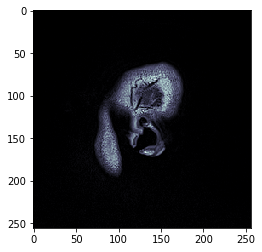

In [6]:
pylab.show()

In [7]:
input_folder = './Datasets/MyHead/'

In [8]:
patients = os.listdir(input_folder)

In [9]:
patients.sort()

In [10]:
lstDCM = []

In [11]:
def load_scan(dir):
    for dirName,subdirList, fileList in os.walk(dir):
        for filename in fileList:
            if ".dcm" in filename.lower():
                lstDCM.append(os.path.join(dirName,filename))
    return lstDCM       

In [12]:
first_patient = load_scan(input_folder)

In [13]:
#print(first_patient)

In [14]:
refDS = dicom.read_file(lstDCM[0])

In [15]:
pixel_dim = (int(refDS.Rows),int(refDS.Columns),int(len(lstDCM)))

In [16]:
print(pixel_dim)

(256, 256, 176)


In [17]:
pixel_spacing = (float(refDS.PixelSpacing[0]),float(refDS.PixelSpacing[1]),float(refDS.SliceThickness))

In [18]:
print(pixel_spacing)

(0.9765625, 0.9765625, 1.0)


In [19]:
x = np.arange(0.0,(pixel_dim[0]+1)*(pixel_spacing[0]),pixel_spacing[0])
y = np.arange(0.0,(pixel_dim[1]+1)*(pixel_spacing[1]),pixel_spacing[1])
z = np.arange(0.0,(pixel_dim[2]+1)*(pixel_spacing[2]),pixel_spacing[2])

In [20]:
#print(x)

In [21]:
array_dicom = np.zeros(pixel_dim,dtype = refDS.pixel_array.dtype)

In [22]:
for filename in lstDCM:
    da = dicom.read_file(filename)
    array_dicom[:,:,lstDCM.index(filename)] = da.pixel_array

In [25]:
pyplot.figure(dpi = 1600)
pyplot.axes().set_aspect('equal','datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x,y,np.flipud(array_dicom[:,:,160]))

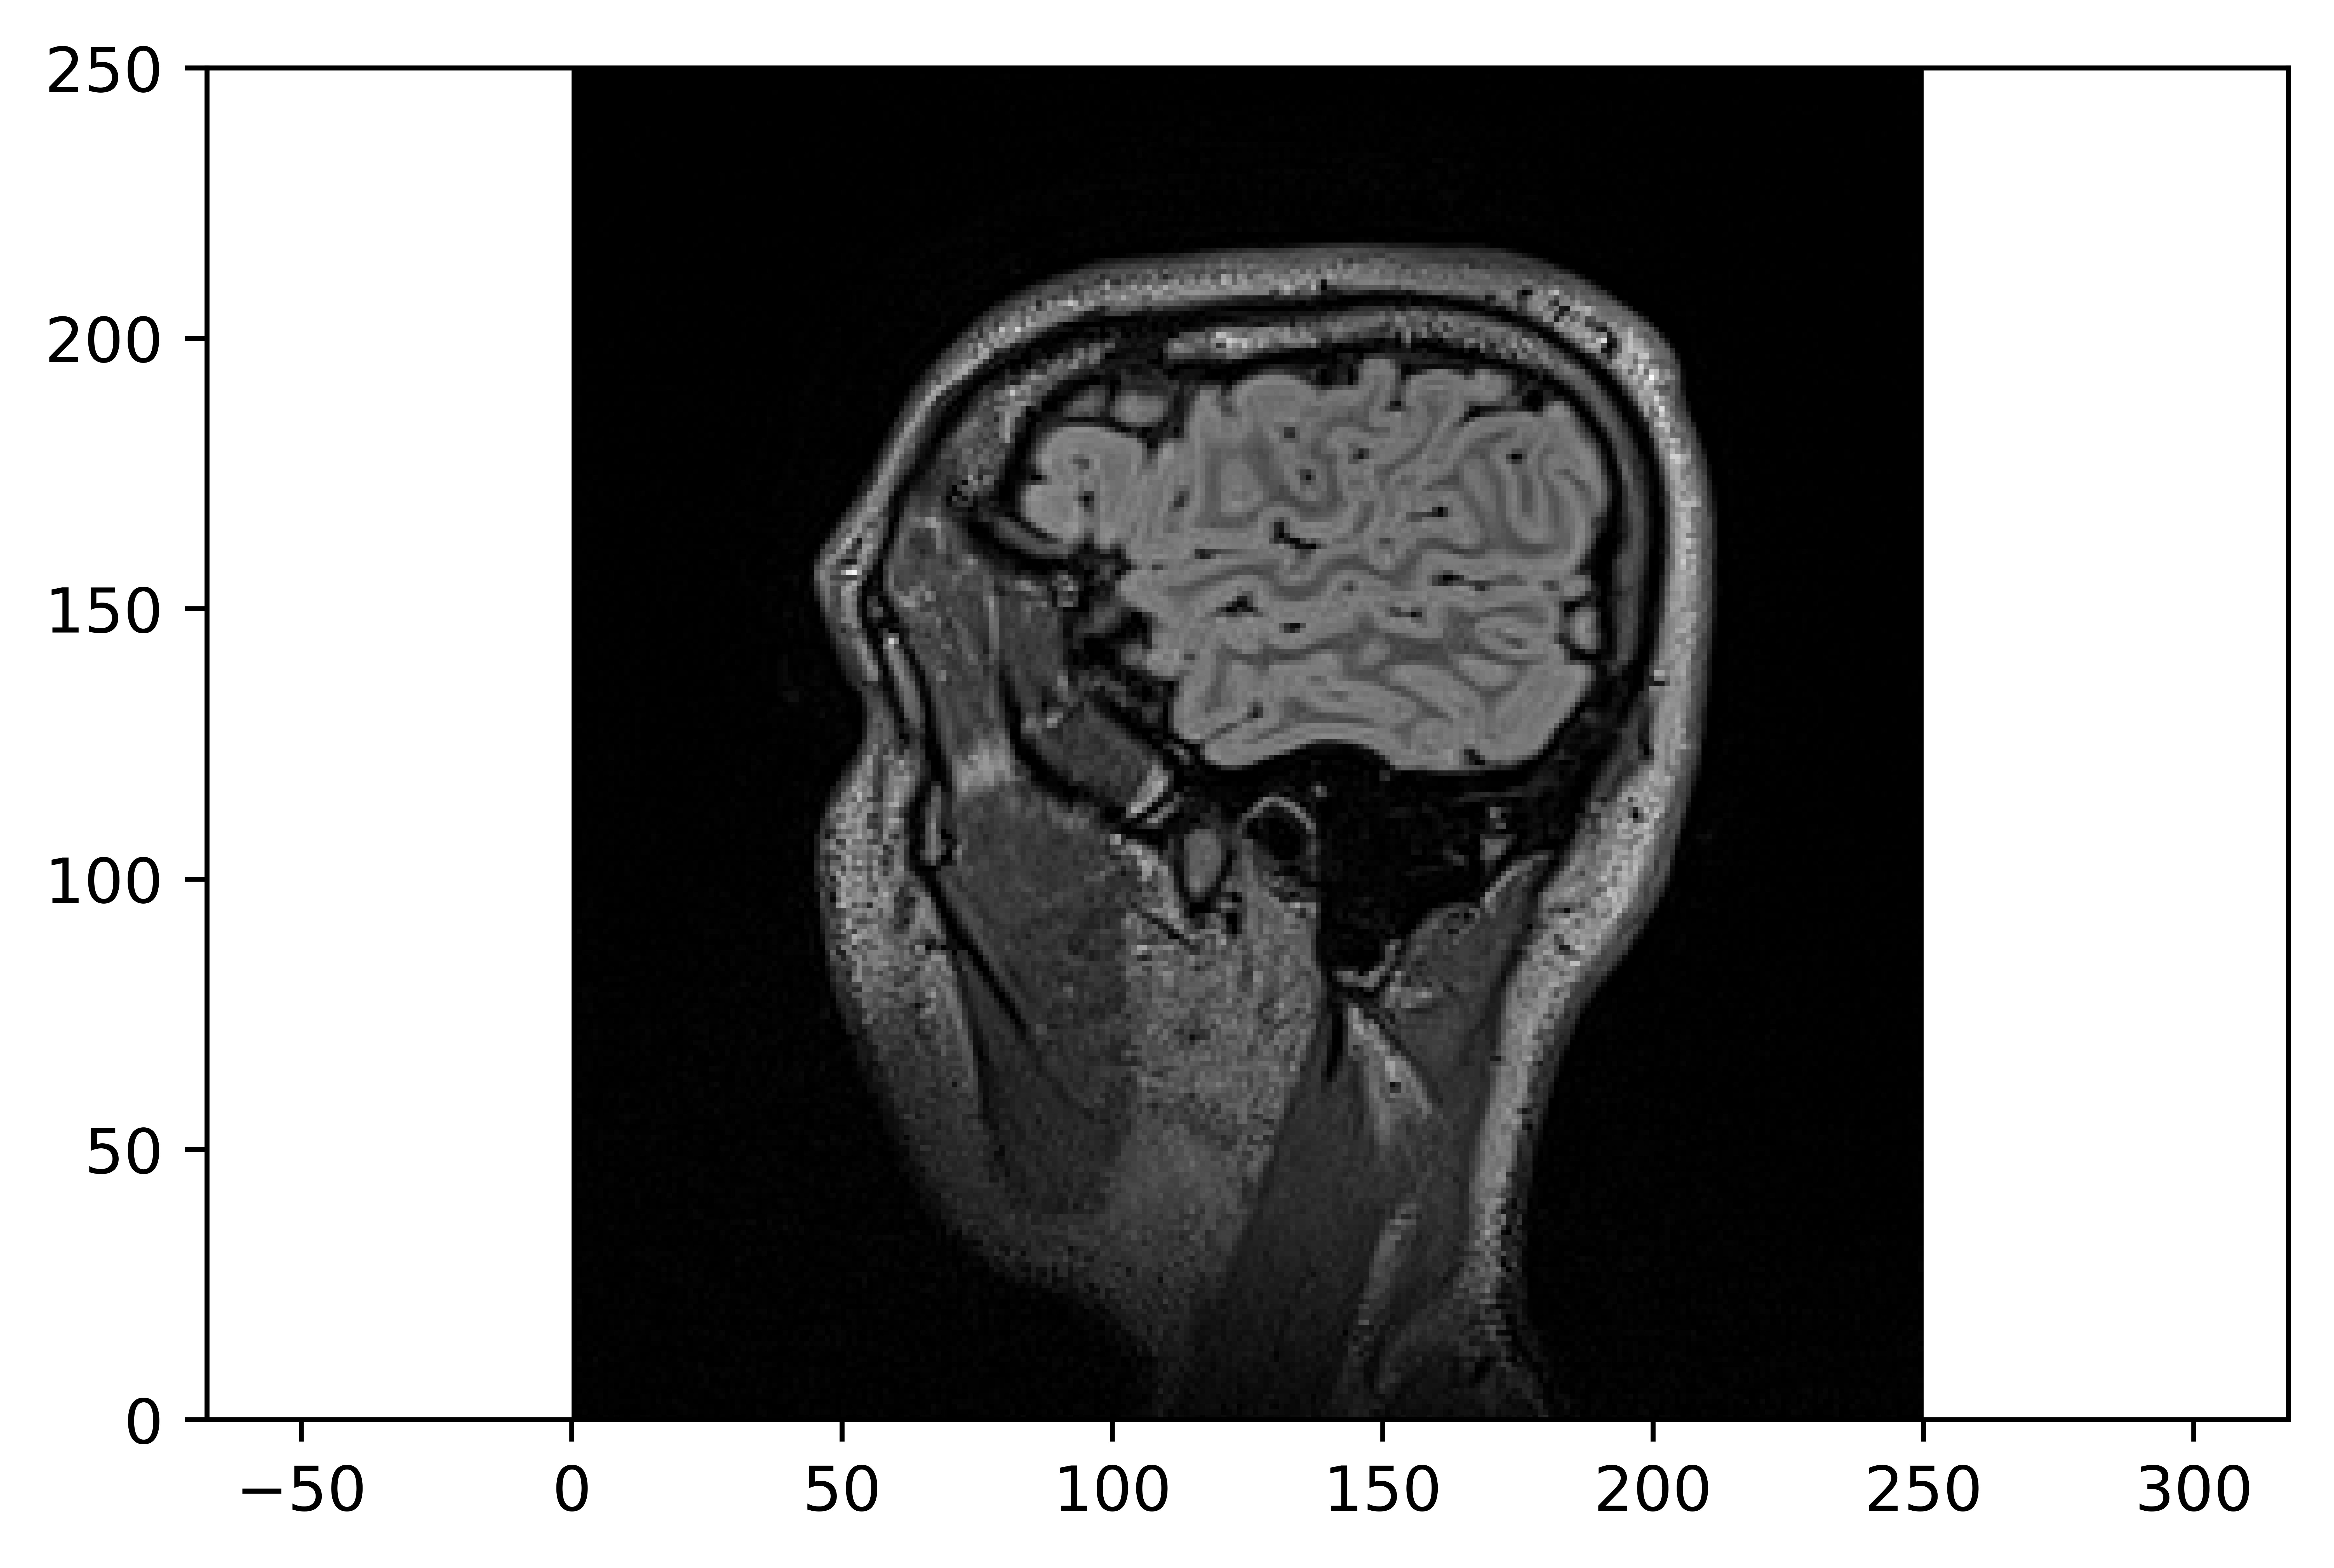

In [26]:
pyplot.show()

In [27]:
import cv2

In [31]:
operations = np.flipud(array_dicom[:,:,60])

In [32]:
print(operations)

[[0 6 2 ..., 4 4 5]
 [0 3 0 ..., 6 3 4]
 [0 0 1 ..., 6 3 0]
 ..., 
 [0 3 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [35]:
image1 = pylab.imshow(df.pixel_array,cmap = pylab.cm.bone)

In [36]:
image1

In [37]:
print(image1)

AxesImage(54,36;334.8x217.44)
